# 실패 과정-밑에 최종 모델 있음

In [ ]:
import os
import json
import cv2
import numpy as np

# 이미지 크기 설정 (128x128로 리사이징)
IMG_SIZE = 128

def load_data(img_dir, label_dir):
    X = []
    y = []

    for json_file in os.listdir(label_dir):
        if json_file.endswith(".json"):
            json_path = os.path.join(label_dir, json_file)
            with open(json_path, "r", encoding="utf-8") as f:
                data = json.load(f)

            # 정상 여부 (True: 정상, False: 불량) → 불량이면 1, 정상 0으로 변환
            label = int(data["image_info"]["is_normal"])

            # 이미지 파일명 가져오기
            img_name = data["image_info"]["file_name"]
            img_path = os.path.join(img_dir, img_name)

            # 이미지가 존재하는 경우에만 로드
            if os.path.exists(img_path):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img.flatten()
                X.append(img)
                y.append(label)

    return np.array(X), np.array(y)

# 경로 설정
train_img_dir = r"C:\sample_ex3000\train\images"
train_label_dir = r"C:\sample_ex3000\train\labels"
val_img_dir = r"C:\sample_ex3000\val\images"
val_label_dir = r"C:\sample_ex3000\val\labels"
test_img_dir = r"C:\sample_ex3000\test\images"
test_label_dir = r"C:\sample_ex3000\test\labels"

# 데이터 불러오기
X_train, y_train = load_data(train_img_dir, train_label_dir)
X_val, y_val = load_data(val_img_dir, val_label_dir)
X_test, y_test = load_data(test_img_dir, test_label_dir)

# 데이터 크기 출력
print(f"훈련 데이터 크기: {X_train.shape}, {y_train.shape}")
print(f"검증 데이터 크기: {X_val.shape}, {y_val.shape}")
print(f"테스트 데이터 크기: {X_test.shape}, {y_test.shape}")

훈련 데이터 크기: (2400, 16384), (2400,)
검증 데이터 크기: (300, 16384), (300,)
테스트 데이터 크기: (300, 16384), (300,)


In [ ]:
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# 결과 저장용 리스트
results = []

# 모델 학습 및 평가
for name, model in models.items():
    print(f"▶ 모델 학습 시작: {name}")
    start_time = time.time()

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 실행 시간 측정
    elapsed_time = time.time() - start_time

    # 결과 저장
    results.append([name, acc, precision, recall, f1, elapsed_time])

    print(f"{name} - 정확도: {acc:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1-score: {f1:.4f}, 학습 시간: {elapsed_time:.2f}초\n")

# 결과 데이터프레임 생성 및 출력
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Time (s)"])
df_results = df_results.sort_values(by="F1-score", ascending=False)  # F1-score 기준 정렬

import ace_tools as tools
tools.display_dataframe_to_user(name="모델 성능 비교", dataframe=df_results)

▶ 모델 학습 시작: RandomForest
RandomForest - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 학습 시간: 2.36초

▶ 모델 학습 시작: SVM
SVM - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 학습 시간: 15.74초

▶ 모델 학습 시작: XGBoost


C:\Users\enjoy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:00:14] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 학습 시간: 29.83초

▶ 모델 학습 시작: KNN
KNN - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 학습 시간: 0.34초

▶ 모델 학습 시작: LogisticRegression
LogisticRegression - 정확도: 0.9833, 정밀도: 0.9908, 재현율: 0.9643, F1-score: 0.9774, 학습 시간: 9.43초



ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
#학습 데이터
import pandas as pd

# 결과 데이터프레임 생성
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Time (s)"])
df_results = df_results.sort_values(by="F1-score", ascending=False)  # F1-score 기준 정렬

# 결과 출력
print(df_results)

                Model  Accuracy  Precision    Recall  F1-score   Time (s)
0        RandomForest  0.986667   1.000000  0.964286  0.981818   2.362487
1                 SVM  0.986667   1.000000  0.964286  0.981818  15.740310
2             XGBoost  0.986667   1.000000  0.964286  0.981818  29.828433
3                 KNN  0.986667   1.000000  0.964286  0.981818   0.341187
4  LogisticRegression  0.983333   0.990826  0.964286  0.977376   9.425169


In [ ]:
#검증 데이터 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 검증 데이터로 모델 성능 평가
results = []

for name, model in models.items():
    print(f"모델 테스트 시작: {name}")

    y_pred = model.predict(X_val)  #

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"{name} - 정확도: {acc:.4f}, 정밀도: {prec:.4f}, 재현율: {rec:.4f}, F1-score: {f1:.4f}")

# 결과 데이터프레임 생성 및 정렬
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
df_results = df_results.sort_values(by="F1-score", ascending=False)

# 결과 출력
print("\n검증 데이터 성능 비교")
print(df_results)

모델 테스트 시작: RandomForest
RandomForest - 정확도: 0.9800, 정밀도: 0.9859, 재현율: 0.9333, F1-score: 0.9589
모델 테스트 시작: SVM
SVM - 정확도: 0.9800, 정밀도: 0.9859, 재현율: 0.9333, F1-score: 0.9589
모델 테스트 시작: XGBoost
XGBoost - 정확도: 0.9833, 정밀도: 1.0000, 재현율: 0.9333, F1-score: 0.9655
모델 테스트 시작: KNN
KNN - 정확도: 0.9800, 정밀도: 0.9859, 재현율: 0.9333, F1-score: 0.9589
모델 테스트 시작: LogisticRegression
LogisticRegression - 정확도: 0.9767, 정밀도: 0.9722, 재현율: 0.9333, F1-score: 0.9524

검증 데이터 성능 비교
                Model  Accuracy  Precision    Recall  F1-score
2             XGBoost  0.983333   1.000000  0.933333  0.965517
0        RandomForest  0.980000   0.985915  0.933333  0.958904
1                 SVM  0.980000   0.985915  0.933333  0.958904
3                 KNN  0.980000   0.985915  0.933333  0.958904
4  LogisticRegression  0.976667   0.972222  0.933333  0.952381


In [ ]:
#테스트 데이터 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 테스트 데이터로 모델 성능 평가
results = []

for name, model in models.items():
    print(f"모델 테스트 시작: {name}")

    y_pred = model.predict(X_test)  #

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"{name} - 정확도: {acc:.4f}, 정밀도: {prec:.4f}, 재현율: {rec:.4f}, F1-score: {f1:.4f}")

# 결과 데이터프레임 생성 및 정렬
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
df_results = df_results.sort_values(by="F1-score", ascending=False)

# 결과 출력
print("\n최종 테스트 데이터 성능 비교")
print(df_results)
#전체적으로 모델 성능이 매우 높음-->정상/불량 분류에서 매우 우수, 그러나 불량 영역을 시각적으로 탐지하지 못하는 한계

모델 테스트 시작: RandomForest
RandomForest - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 테스트 시작: SVM
SVM - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 테스트 시작: XGBoost
XGBoost - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 테스트 시작: KNN
KNN - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 테스트 시작: LogisticRegression
LogisticRegression - 정확도: 0.9833, 정밀도: 0.9908, 재현율: 0.9643, F1-score: 0.9774

최종 테스트 데이터 성능 비교
                Model  Accuracy  Precision    Recall  F1-score
0        RandomForest  0.986667   1.000000  0.964286  0.981818
1                 SVM  0.986667   1.000000  0.964286  0.981818
2             XGBoost  0.986667   1.000000  0.964286  0.981818
3                 KNN  0.986667   1.000000  0.964286  0.981818
4  LogisticRegression  0.983333   0.990826  0.964286  0.977376


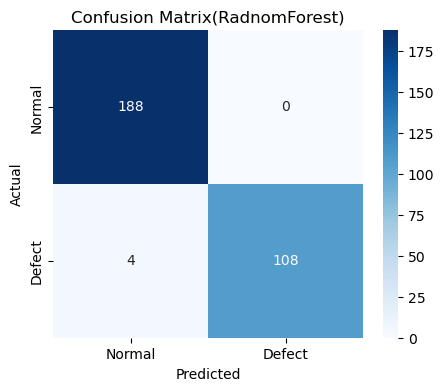

Classification Report (Test Data):

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       188
      Defect       1.00      0.96      0.98       112

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
#RandomForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 테스트 데이터 예측
y_pred_test = models["RandomForest"].predict(X_test)  # RandomForest 모델 사용 (다른 모델도 가능)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_test)

# 혼동 행렬 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Defect"], yticklabels=["Normal", "Defect"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix(RadnomForest)")
plt.show()

# 정밀한 성능 보고
print("Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred_test, target_names=["Normal", "Defect"]))

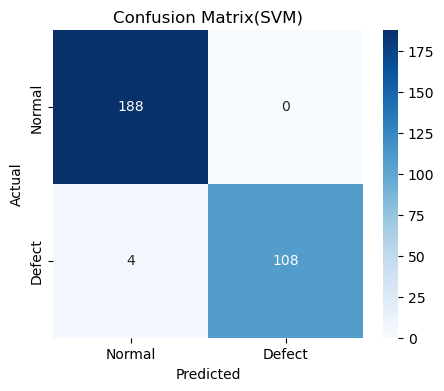

Classification Report (Test Data):

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       188
      Defect       1.00      0.96      0.98       112

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
#SVM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 테스트 데이터 예측
y_pred_test = models["SVM"].predict(X_test)  # RandomForest 모델 사용 (다른 모델도 가능)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_test)

# 혼동 행렬 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Defect"], yticklabels=["Normal", "Defect"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix(SVM)")
plt.show()

# 정밀한 성능 보고
print("Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred_test, target_names=["Normal", "Defect"]))


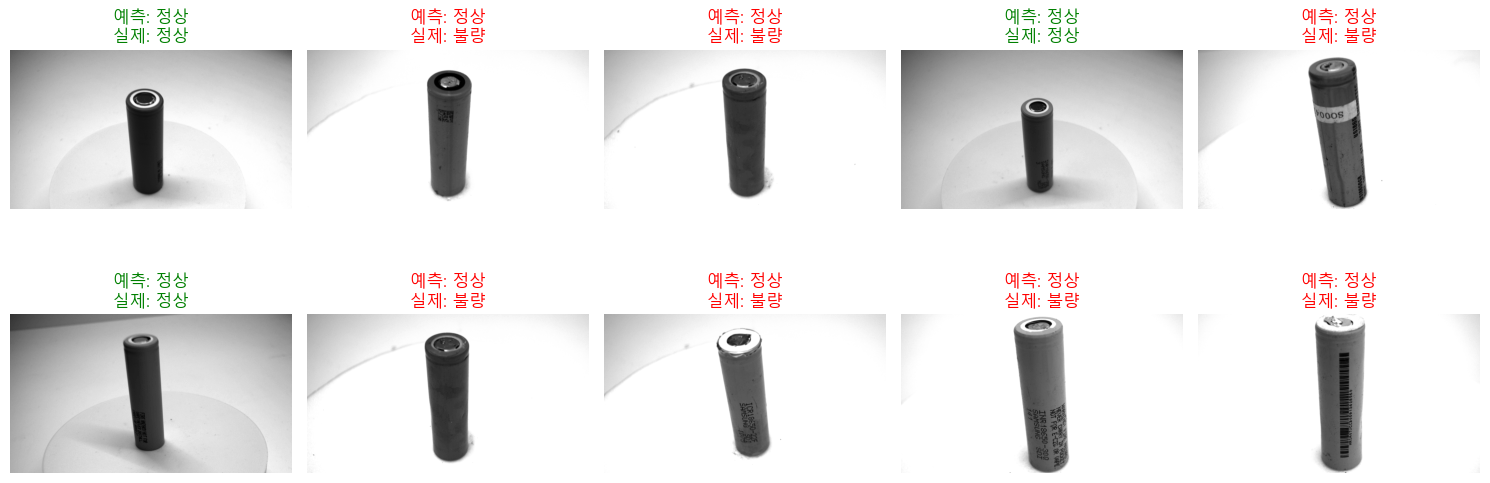

In [ ]:
#XGBoost모델로 이미지(정상/불량) 예측
import os
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt

# 테스트 데이터 경로
test_img_dir = r"C:\sample_ex3000\test\images"
test_label_dir = r"C:\sample_ex3000\test\labels"

# 랜덤 샘플 10개 선택
test_images = [f for f in os.listdir(test_img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
selected_images = np.random.choice(test_images, 10, replace=False)

# 모델 불러오기
best_model = models["XGBoost"]  # XGBoost 사용 (또는 다른 모델)

# 예측 및 실제 라벨 비교
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(test_img_dir, img_name)
    json_path = os.path.join(test_label_dir, img_name.replace(".png", ".json").replace(".jpg", ".json"))

    # 이미지 불러오기 & 전처리 (흑백 변환 → 128x128 리사이징 → 1D 벡터 변환)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 흑백 변환
    img_resized = cv2.resize(img, (128, 128)).flatten()  # 1D 벡터 변환
    img_resized = img_resized / 255.0  # 정규화

    # 실제 라벨 불러오기
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        actual_label = "정상" if data["image_info"]["is_normal"] else "불량"

    #  모델 예측
    pred_label = "정상" if best_model.predict([img_resized])[0] == 1 else "불량"

    #  결과 출력
    axes[i // 5, i % 5].imshow(img, cmap="gray")  # 흑백 이미지 출력
    axes[i // 5, i % 5].set_title(f"예측: {pred_label}\n실제: {actual_label}", fontsize=12,
                                 color="green" if pred_label == actual_label else "red")
    axes[i // 5, i % 5].axis("off")

plt.tight_layout()
plt.show()
#흑백이미지로 학습해서 실제와 일치하지 않는 결과--> 컬러이미지로 다시 학습

# 컬러 이미지로 다시 학습 진행

# 최종

In [ ]:
import os
import numpy as np
import cv2
import json

# 데이터 경로 설정
train_img_dir = r"C:\sample_ex3000\train\images"
train_label_dir = r"C:\sample_ex3000\train\labels"

# 데이터 불러오기
def load_data(img_dir, label_dir, img_size=(128, 128)):
    X, y = [], []

    for json_file in os.listdir(label_dir):
        if json_file.endswith(".json"):
            json_path = os.path.join(label_dir, json_file)
            img_path = os.path.join(img_dir, json_file.replace(".json", ".png"))

            # JSON 파일 로드
            with open(json_path, "r", encoding="utf-8") as f:
                data = json.load(f)

            # 이미지 로드 (컬러 유지)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB 변환
            img_resized = cv2.resize(img, img_size)  # 128×128 크기 조정
            img_flattened = img_resized.flatten() / 255.0  # 1D 벡터 변환

            # 정상/불량 라벨
            label = int(data["image_info"]["is_normal"])  # 정상=1, 불량=0

            X.append(img_flattened)
            y.append(label)

    return np.array(X), np.array(y)

# 데이터 불러오기
X_train, y_train = load_data(train_img_dir, train_label_dir)
X_val, y_val = load_data(r"C:\sample_ex3000\val\images", r"C:\sample_ex3000\val\labels")
X_test, y_test = load_data(r"C:\sample_ex3000\test\images", r"C:\sample_ex3000\test\labels")

print(f"훈련 데이터 크기: {X_train.shape}, {y_train.shape}")
print(f"검증 데이터 크기: {X_val.shape}, {y_val.shape}")
print(f"테스트 데이터 크기: {X_test.shape}, {y_test.shape}")

훈련 데이터 크기: (2400, 49152), (2400,)
검증 데이터 크기: (300, 49152), (300,)
테스트 데이터 크기: (300, 49152), (300,)


In [ ]:
#검증 데이터에서 성능 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd

#  모델 리스트 (XGBoost 최적화 적용)
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "XGBoost": XGBClassifier(
        n_estimators=100, max_depth=4, subsample=0.8, colsample_bytree=0.8,
        tree_method='hist', use_label_encoder=False, eval_metric="logloss"
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression()
}

# 모델 학습 및 평가
results = []

for name, model in models.items():
    print(f"모델 학습 시작: {name}")

    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    #  테스트 데이터 평가
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"{name} - 정확도: {acc:.4f}, 정밀도: {prec:.4f}, 재현율: {rec:.4f}, F1-score: {f1:.4f}")

#  결과 출력
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
df_results = df_results.sort_values(by="F1-score", ascending=False)

print("\n최종 테스트 데이터 성능 비교")
print(df_results)

모델 학습 시작: RandomForest
RandomForest - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 학습 시작: SVM
SVM - 정확도: 0.9800, 정밀도: 0.9818, 재현율: 0.9643, F1-score: 0.9730
모델 학습 시작: XGBoost


C:\Users\enjoy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:47] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 학습 시작: KNN
KNN - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818
모델 학습 시작: LogisticRegression
LogisticRegression - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818

최종 테스트 데이터 성능 비교
                Model  Accuracy  Precision    Recall  F1-score
0        RandomForest  0.986667   1.000000  0.964286  0.981818
2             XGBoost  0.986667   1.000000  0.964286  0.981818
3                 KNN  0.986667   1.000000  0.964286  0.981818
4  LogisticRegression  0.986667   1.000000  0.964286  0.981818
1                 SVM  0.980000   0.981818  0.964286  0.972973


C:\Users\enjoy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 모델 이름 리스트
models = df_results["Model"].tolist()

# 성능 지표 리스트 변환
accuracy = df_results["Accuracy"].tolist()
precision = df_results["Precision"].tolist()
recall = df_results["Recall"].tolist()
f1_score = df_results["F1-score"].tolist()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: [0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98]
Precision: [1.0, 1.0, 1.0, 1.0, 0.9818181818181818]
Recall: [0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]
F1-score: [0.9818181818181818, 0.9818181818181818, 0.9818181818181818, 0.9818181818181818, 0.972972972972973]


C:\Users\enjoy\AppData\Local\Temp\ipykernel_7996\2064431425.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=20, ha="right")
C:\Users\enjoy\AppData\Local\Temp\ipykernel_7996\2064431425.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=20, ha="right")
C:\Users\enjoy\AppData\Local\Temp\ipykernel_7996\2064431425.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=20, ha="right")
C:\Users\enjoy\AppData\Local\Temp\ipykernel_7996\2064431425.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=20, ha="right")


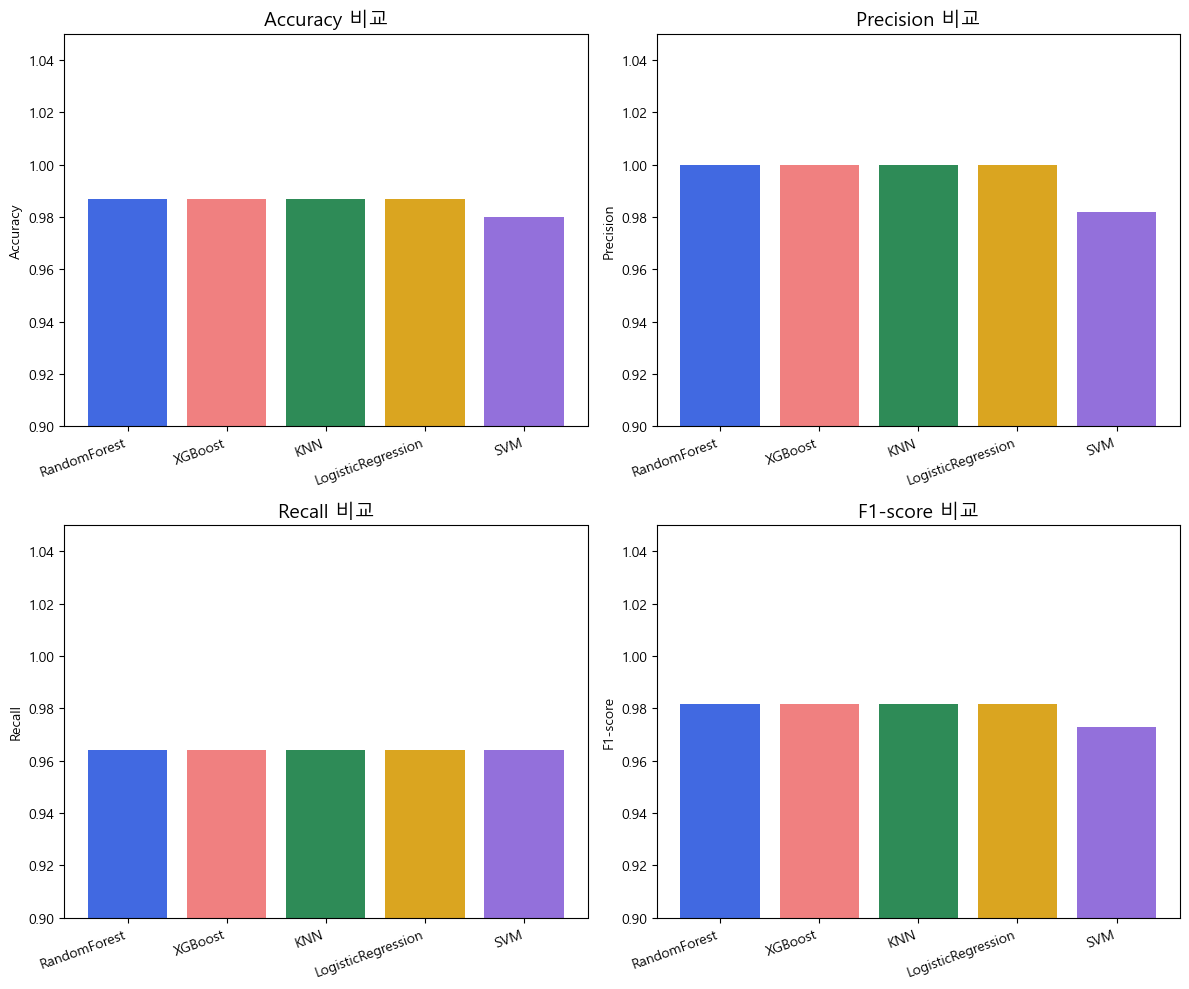

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 성능 지표별 그래프
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [accuracy, precision, recall, f1_score]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.bar(models, values[i], color=['royalblue', 'lightcoral', 'seagreen', 'goldenrod', 'mediumpurple'])
    ax.set_title(f"{metrics[i]} 비교", fontsize=14)
    ax.set_ylim(0.9, 1.05)
    ax.set_ylabel(metrics[i])
    ax.set_xticklabels(models, rotation=20, ha="right")

plt.tight_layout()
plt.show()



모델 평가 시작: RandomForest
RandomForest 모델 성능:
  정확도(Accuracy): 0.9867
  정밀도(Precision): 1.0000
  재현율(Recall): 0.9643
  F1-score: 0.9818


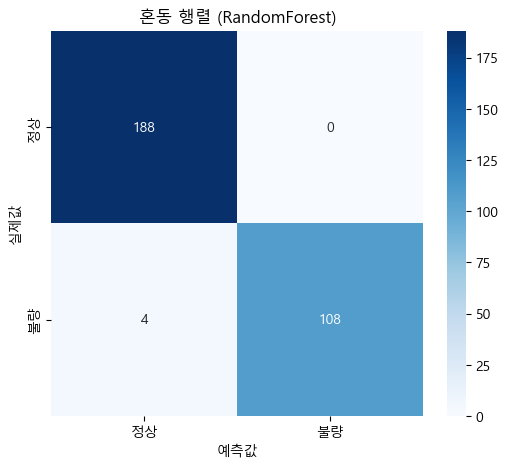


모델 평가 시작: SVM
SVM 모델 성능:
  정확도(Accuracy): 0.9800
  정밀도(Precision): 0.9818
  재현율(Recall): 0.9643
  F1-score: 0.9730


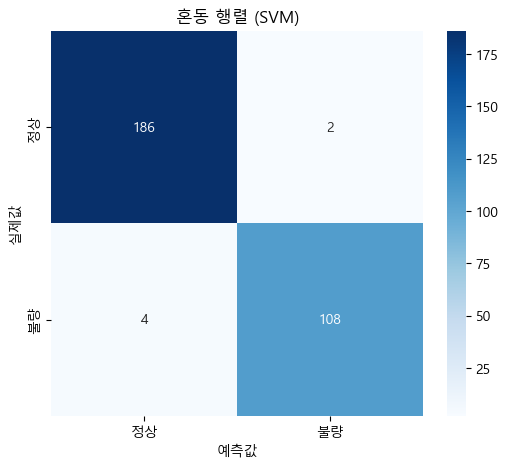


모델 평가 시작: XGBoost
XGBoost 모델 성능:
  정확도(Accuracy): 0.9867
  정밀도(Precision): 1.0000
  재현율(Recall): 0.9643
  F1-score: 0.9818


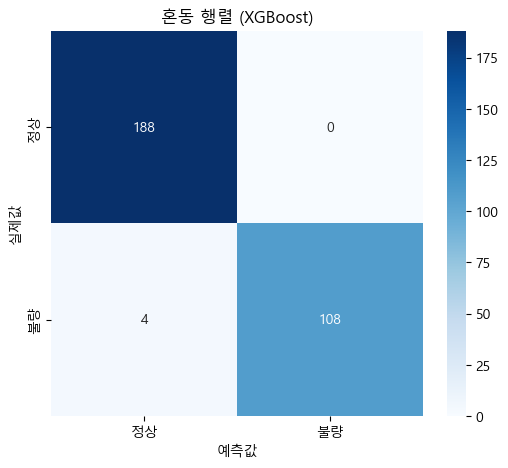


모델 평가 시작: KNN
KNN 모델 성능:
  정확도(Accuracy): 0.9867
  정밀도(Precision): 1.0000
  재현율(Recall): 0.9643
  F1-score: 0.9818


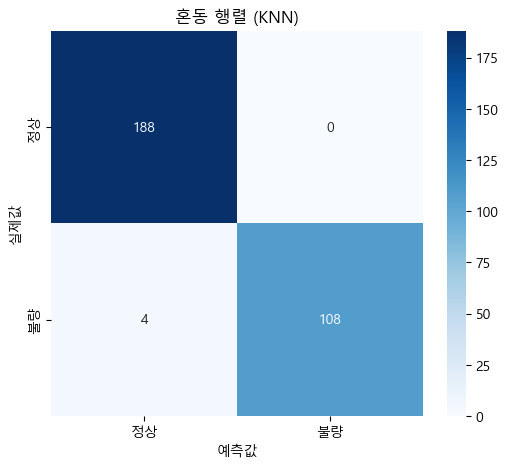


모델 평가 시작: LogisticRegression
LogisticRegression 모델 성능:
  정확도(Accuracy): 0.9867
  정밀도(Precision): 1.0000
  재현율(Recall): 0.9643
  F1-score: 0.9818


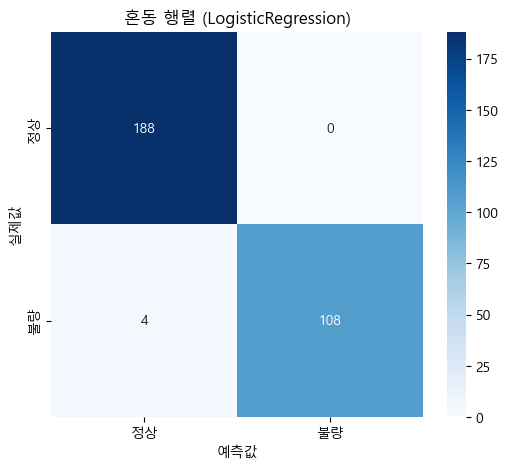

In [ ]:
# 각 모델에 대한 성능 평가, Confusion Matrix
for name, model in models.items():
    print(f"\n모델 평가 시작: {name}")

    # 모델 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} 모델 성능:")
    print(f"  정확도(Accuracy): {accuracy:.4f}")
    print(f"  정밀도(Precision): {precision:.4f}")
    print(f"  재현율(Recall): {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    # 혼동 행렬 시각화
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["정상", "불량"], yticklabels=["정상", "불량"])
    plt.xlabel("예측값")
    plt.ylabel("실제값")
    plt.title(f"혼동 행렬 ({name})")
    plt.show()


In [ ]:
# 테스트 데이터에서 최종 성능 평가
results_test = []

for name, model in models.items():
    print(f"모델 테스트 시작: {name}")

    start_time = time.time()
    y_pred_test = model.predict(X_test)  # 테스트 데이터에서 예측
    elapsed_time = time.time() - start_time

    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    results_test.append([name, acc_test, prec_test, rec_test, f1_test, elapsed_time])

    print(f"{name} - 정확도: {acc_test:.4f}, 정밀도: {prec_test:.4f}, 재현율: {rec_test:.4f}, F1-score: {f1_test:.4f}, 테스트 시간: {elapsed_time:.2f}초")

# 결과 데이터프레임 생성 및 정렬
df_results_test = pd.DataFrame(results_test, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "Time (s)"])
df_results_test = df_results_test.sort_values(by="F1-score", ascending=False)

print("\n최종 테스트 데이터 성능 비교")
print(df_results_test)

모델 테스트 시작: RandomForest
RandomForest - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 테스트 시간: 0.04초
모델 테스트 시작: SVM
SVM - 정확도: 0.9800, 정밀도: 0.9818, 재현율: 0.9643, F1-score: 0.9730, 테스트 시간: 1.19초
모델 테스트 시작: XGBoost
XGBoost - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 테스트 시간: 0.08초
모델 테스트 시작: KNN
KNN - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 테스트 시간: 0.54초
모델 테스트 시작: LogisticRegression
LogisticRegression - 정확도: 0.9867, 정밀도: 1.0000, 재현율: 0.9643, F1-score: 0.9818, 테스트 시간: 0.02초

최종 테스트 데이터 성능 비교
                Model  Accuracy  Precision    Recall  F1-score  Time (s)
0        RandomForest  0.986667   1.000000  0.964286  0.981818  0.037015
2             XGBoost  0.986667   1.000000  0.964286  0.981818  0.077000
3                 KNN  0.986667   1.000000  0.964286  0.981818  0.536003
4  LogisticRegression  0.986667   1.000000  0.964286  0.981818  0.023005
1                 SVM  0.980000   0.981818  0.964286  0.972973  1.187973


C:\Users\enjoy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:06] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


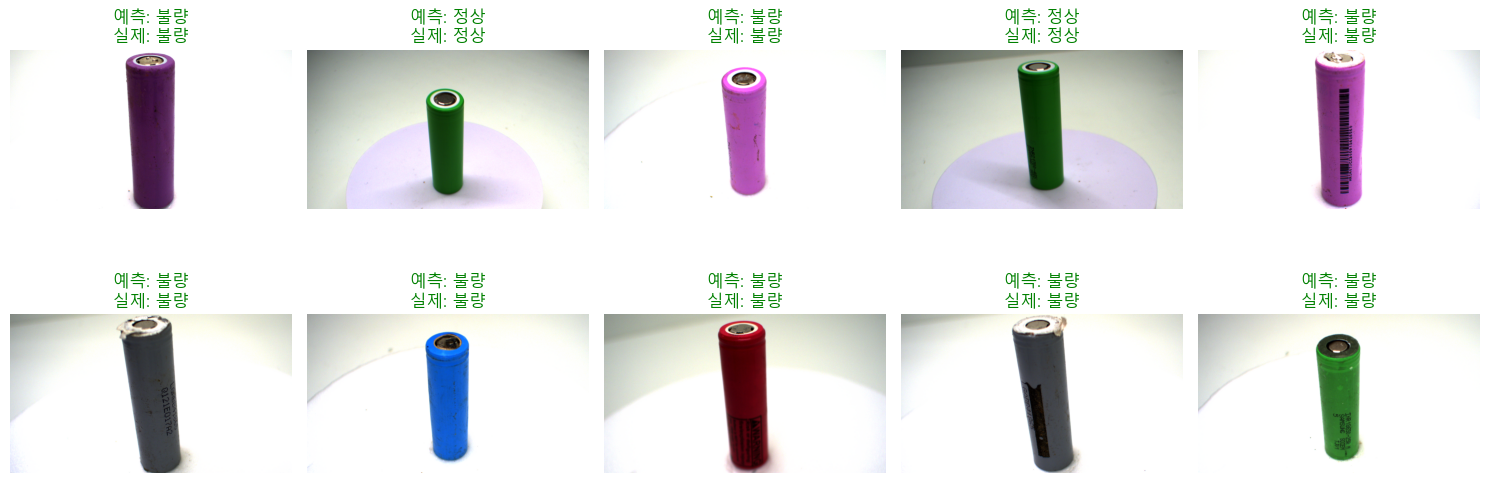

In [ ]:
#Xgboost에서 실제 이미지로 테스트
import os
import random
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (폰트 깨짐 방지)
plt.rc("font", family="Malgun Gothic")

# 테스트 이미지 & 라벨 경로
test_img_dir = r"C:\sample_ex3000\test\images"
test_label_dir = r"C:\sample_ex3000\test\labels"

# 최적 모델 선택 (성능이 가장 높은 모델)
best_model = XGBClassifier(
    n_estimators=100, max_depth=4, subsample=0.8, colsample_bytree=0.8,
    tree_method='hist', use_label_encoder=False, eval_metric="logloss"
)
best_model.fit(X_train, y_train)

# 랜덤 10개 이미지 선택
image_files = [f for f in os.listdir(test_img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
selected_images = random.sample(image_files, 10)

# 예측 및 시각화
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(selected_images):
    # 이미지 로드 & 전처리 (224x224로 리사이징)
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128)).astype(np.float32) / 255.0

    # JSON 라벨 로드
    json_name = os.path.splitext(img_name)[0] + ".json"
    json_path = os.path.join(test_label_dir, json_name)

    if os.path.exists(json_path):
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        actual_label = "정상" if data["image_info"]["is_normal"] else "불량"
    else:
        actual_label = "알 수 없음"

    # 모델 예측
    img_flattened = img_resized.flatten().reshape(1, -1)
    pred_label = "정상" if best_model.predict(img_flattened)[0] == 1 else "불량"

    # 색상 설정
    pred_color = "green" if pred_label == actual_label else "red"

    # 결과 시각화
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].set_title(f"예측: {pred_label}\n실제: {actual_label}", fontsize=12, color=pred_color)
    axes[i // 5, i % 5].axis("off")

plt.tight_layout()
plt.show()

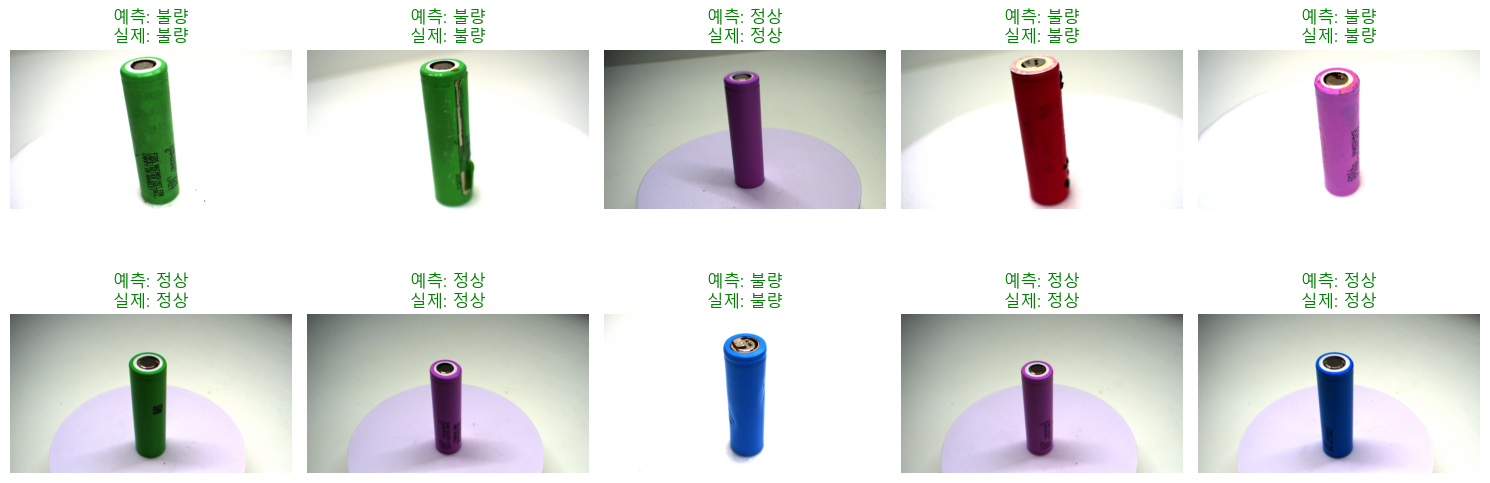

In [ ]:
#RandomForest에서 실제 이미지로 테스트
import os
import random
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 한글 폰트 설정 (폰트 깨짐 방지)
plt.rc("font", family="Malgun Gothic")

# 테스트 이미지 & 라벨 경로
test_img_dir = r"C:\sample_ex3000\test\images"
test_label_dir = r"C:\sample_ex3000\test\labels"

# 성능이 높은 RandomForest 모델 선택
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# 랜덤 10개 이미지 선택
image_files = [f for f in os.listdir(test_img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
selected_images = random.sample(image_files, 10)

# 예측 및 시각화
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, img_name in enumerate(selected_images):
    # 이미지 로드 & 전처리 (128x128로 리사이징)
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128)).astype(np.float32) / 255.0

    # JSON 라벨 로드
    json_name = os.path.splitext(img_name)[0] + ".json"
    json_path = os.path.join(test_label_dir, json_name)

    if os.path.exists(json_path):
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        actual_label = "정상" if data["image_info"]["is_normal"] else "불량"
    else:
        actual_label = "알 수 없음"

    # 모델 예측
    img_flattened = img_resized.flatten().reshape(1, -1)
    pred_label = "정상" if best_model.predict(img_flattened)[0] == 1 else "불량"

    # 색상 설정 (예측이 맞으면 초록, 틀리면 빨강)
    pred_color = "green" if pred_label == actual_label else "red"

    # 결과 시각화
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].set_title(f"예측: {pred_label}\n실제: {actual_label}", fontsize=12, color=pred_color)
    axes[i // 5, i % 5].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# 최적 모델 학습
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# 모델 저장
joblib.dump(best_rf, "best_randomforest_model.pkl")
print("RandomForest 모델이 best_randomforest_model.pkl로 저장되었습니다.")

RandomForest 모델이 best_randomforest_model.pkl로 저장되었습니다.


배터리 정상/불량 분류를 위해 기본적인 머신러닝 모델을 활용한 결과, RandomForest, SVM, XGBoost 등의 알고리즘에서 **98% 이상의 높은 정확도와 정밀도(Precision) 100%**를 기록하며 매우 우수한 성능을 보였다.
특히, 거짓 양성(False Positive)이 거의 발생하지 않아, 정상 제품을 불량으로 오판하는 경우가 적어 실제 산업 적용에서도 활용 가능성이 높음을 확인하였다.
그러나 이러한 기본 머신러닝 모델은 단순한 정상/불량 판정만 가능하며, 배터리에서 불량이 발생한 위치나 유형을 파악할 수 없는 한계가 있다.
즉, 모델이 ‘불량’으로 판정하더라도, 어디에서 결함이 발생했는지 또는 오염, 손상 등 어떤 종류의 불량인지를 알 수 없어 실질적인 품질 관리에는 부족한 점이 있었다.
이를 해결하기 위해 U-Net 기반의 불량 영역 시각화 모델을 추가적으로 개발하고자 한다.